# Tank Mix Trial

#### Authors: Tim Waters & David Linnard Wheeler

## Import & inspect data

- Import packages

In [27]:
library(agricolae)
library(Hmisc)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(patchwork)
library(DescTools)
library(knitr)
library(car)

In [28]:
df=read.table("/Users/davidwheeler/Desktop/RESEARCH/Data/TankMixTrial/Data/TankMixData.csv",
                header=T, sep=",")

- Inspect data

In [29]:
str(df)

'data.frame':	48 obs. of  10 variables:
 $ Treatment         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Description       : chr  "CHK" "Warrior 1.92 FL OZ/A;Manzate 1.6 QT/A;NIS .25 % V/V" "Warrior 1.92 FL OZ/A;NIS .25 % V/V" "Manzate 1.6 QT/A;NIS .25 % V/V" ...
 $ Block             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Code              : chr  "111-1" "102-2" "110-3" "109-4" ...
 $ Senescence_7.1.20 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_7.8.20 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_7.15.20: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_7.29.20: int  0 2 0 0 5 2 5 2 2 0 ...
 $ Senescence_8.12.20: int  15 6 25 10 5 5 5 5 4 0 ...
 $ Senescence_8.18.20: int  20 15 55 15 5 30 10 30 5 10 ...


- Coerce `Treatment` and `Block` from `int` to `factors`

In [30]:
df[c("Treatment", "Block")] <- lapply(df[c("Treatment", "Block")],
                                                factor)

- sanity check

In [31]:
str(df)

'data.frame':	48 obs. of  10 variables:
 $ Treatment         : Factor w/ 12 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Description       : chr  "CHK" "Warrior 1.92 FL OZ/A;Manzate 1.6 QT/A;NIS .25 % V/V" "Warrior 1.92 FL OZ/A;NIS .25 % V/V" "Manzate 1.6 QT/A;NIS .25 % V/V" ...
 $ Block             : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ Code              : chr  "111-1" "102-2" "110-3" "109-4" ...
 $ Senescence_7.1.20 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_7.8.20 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_7.15.20: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Senescence_7.29.20: int  0 2 0 0 5 2 5 2 2 0 ...
 $ Senescence_8.12.20: int  15 6 25 10 5 5 5 5 4 0 ...
 $ Senescence_8.18.20: int  20 15 55 15 5 30 10 30 5 10 ...


- What are the unique values of each column

In [6]:
lapply(df, unique) 

$Treatment
 [1] 1  2  3  4  5  6  7  8  9  10 11 12
Levels: 1 2 3 4 5 6 7 8 9 10 11 12

$Description
 [1] "CHK"                                                                    
 [2] "Warrior 1.92 FL OZ/A;Manzate 1.6 QT/A;NIS .25 % V/V"                    
 [3] "Warrior 1.92 FL OZ/A;NIS .25 % V/V"                                     
 [4] "Manzate 1.6 QT/A;NIS .25 % V/V"                                         
 [5] "Beleaf 2.8 FL OZ/A;Luna Tranquility 16 FL OZ/A;NIS .25 % V/V"           
 [6] "Beleaf 2.8 FL OZ/A;NIS .25 % V/V"                                       
 [7] "Luna Tranquility 16 FL OZ/A;NIS .25 % V/V"                              
 [8] "Beleaf 2.8 FL OZ/A;Bravo WS .75 PT/A;Bravo WS 1.5 PT/A;NIS .25 % V/V"   
 [9] "Bravo WS .75 PT/A;Bravo WS 1.5 PT/A;NIS .25 % V/V"                      
[10] "Warrior 1.92 FL OZ/A;Bravo WS .75 PT/A;Bravo WS 1.5 PT/A;NIS 0.25 % V/V"
[11] "Beleaf 2.8 FL OZ/A;Manzate 1.6 QT/A;NIS .25 % V/V"                      
[12] "Warrior 1.92 FL OZ/A;Luna Tranquility 16 FL OZ/A;NIS .25 % V/V"         

$Block
[1] 1 2 3 4
Levels: 1 2 3 4

$Code
 [1] "111-1"  "102-2"  "110-3"  "109-4"  "104-5"  "107-6"  "108-7"  "105-8" 
 [9] "101-9"  "112-10" "103-11" "106-12" "201-1"  "208-2"  "212-3"  "206-4" 
[17] "209-5"  "205-6"  "202-7"  "203-8"  "211-9"  "210-10" "204-11" "207-12"
[25] "304-1"  "303-2"  "301-3"  "305-4"  "307-5"  "308-6"  "306-7"  "309-8" 
[33] "312-9"  "311-10" "302-11" "310-12" "401-1"  "404-2"  "412-3"  "406-4" 
[41] "410-5"  "405-6"  "408-7"  "403-8"  "407-9"  "402-10" "409-11" "411-12"

$Senescence_7.1.20
[1] 0

$Senescence_7.8.20
[1] 0

$Senescence_7.15.20
[1] 0

$Senescence_7.29.20
[1]  0  2  5 15 10  6  4 20

$Senescence_8.12.20
 [1] 15  6 25 10  5  4  0  8  2 20

$Senescence_8.18.20
 [1] 20 15 55  5 30 10 70 45 50 35 25 40  6

## Curate data

AUSPC

- Inspect names

In [7]:
names(df)

[1] "Treatment"          "Description"        "Block"             
 [4] "Code"               "Senescence_7.1.20"  "Senescence_7.8.20" 
 [7] "Senescence_7.15.20" "Senescence_7.29.20" "Senescence_8.12.20"
[10] "Senescence_8.18.20"

- Extract days of the month when data were collected

In [8]:
ts <- gsub("(?:[^.]+\\.){1}([^.]+).*", "\\1",
    names(df)[(grepl("Sen", names(df)))])
ts

[1] "1"  "8"  "15" "29" "12" "18"

- Convert to numbers

In [9]:
ts <- as.numeric(ts)
ts

[1]  1  8 15 29 12 18

- Convert days in August to 'extra' days in July

In [10]:
ts[5:6] <- ts[5:6]+31
ts

[1]  1  8 15 29 43 49

In [11]:
ts

[1]  1  8 15 29 43 49

- Rename columns

In [12]:
names(df)[(grepl("Sen", names(df)))] <- ts

- Sanity check

In [13]:
head(df)

,Treatment,Description,Block,Code,1,8,15,29,43,49
,<fct>,<chr>,<fct>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,CHK,1,111-1,0,0,0,0,15,20
2,2,Warrior 1.92 FL OZ/A;Manzate 1.6 QT/A;NIS .25 % V/V,1,102-2,0,0,0,2,6,15
3,3,Warrior 1.92 FL OZ/A;NIS .25 % V/V,1,110-3,0,0,0,0,25,55
4,4,Manzate 1.6 QT/A;NIS .25 % V/V,1,109-4,0,0,0,0,10,15
5,5,Beleaf 2.8 FL OZ/A;Luna Tranquility 16 FL OZ/A;NIS .25 % V/V,1,104-5,0,0,0,5,5,5
6,6,Beleaf 2.8 FL OZ/A;NIS .25 % V/V,1,107-6,0,0,0,2,5,30


In [14]:
colnames(df)

[1] "Treatment"   "Description" "Block"       "Code"        "1"          
 [6] "8"           "15"          "29"          "43"          "49"

In [15]:
df$AUDPC <- audpc(df[,5:10],ts)

## Summary statistics

### summaries

In [16]:
summary(df)

   Treatment  Description        Block      Code                 1    
 1      : 4   Length:48          1:12   Length:48          Min.   :0  
 2      : 4   Class :character   2:12   Class :character   1st Qu.:0  
 3      : 4   Mode  :character   3:12   Mode  :character   Median :0  
 4      : 4                      4:12                      Mean   :0  
 5      : 4                                                3rd Qu.:0  
 6      : 4                                                Max.   :0  
 (Other):24                                                           
       8           15          29               43               49       
 Min.   :0   Min.   :0   Min.   : 0.000   Min.   : 0.000   Min.   : 5.00  
 1st Qu.:0   1st Qu.:0   1st Qu.: 2.000   1st Qu.: 3.500   1st Qu.:10.00  
 Median :0   Median :0   Median : 2.000   Median : 5.000   Median :20.00  
 Mean   :0   Mean   :0   Mean   : 4.229   Mean   : 6.604   Mean   :22.21  
 3rd Qu.:0   3rd Qu.:0   3rd Qu.: 5.000   3rd Qu.: 8.500 

In [17]:
describe(df)

df 

 11  Variables      48  Observations
--------------------------------------------------------------------------------
Treatment 
       n  missing distinct 
      48        0       12 

lowest : 1  2  3  4  5 , highest: 8  9  10 11 12
                                                                            
Value          1     2     3     4     5     6     7     8     9    10    11
Frequency      4     4     4     4     4     4     4     4     4     4     4
Proportion 0.083 0.083 0.083 0.083 0.083 0.083 0.083 0.083 0.083 0.083 0.083
                
Value         12
Frequency      4
Proportion 0.083
--------------------------------------------------------------------------------
Description 
       n  missing distinct 
      48        0       12 

lowest : Beleaf 2.8 FL OZ/A;Bravo WS .75 PT/A;Bravo WS 1.5 PT/A;NIS .25 % V/V    Beleaf 2.8 FL OZ/A;Luna Tranquility 16 FL OZ/A;NIS .25 % V/V            Beleaf 2.8 FL OZ/A;Manzate 1.6 QT/A;NIS .25 % V/V                       Beleaf 2

### summary statistics by treatment

In [18]:
str(df)

'data.frame':	48 obs. of  11 variables:
 $ Treatment  : Factor w/ 12 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Description: chr  "CHK" "Warrior 1.92 FL OZ/A;Manzate 1.6 QT/A;NIS .25 % V/V" "Warrior 1.92 FL OZ/A;NIS .25 % V/V" "Manzate 1.6 QT/A;NIS .25 % V/V" ...
 $ Block      : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ Code       : chr  "111-1" "102-2" "110-3" "109-4" ...
 $ 1          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 8          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 15         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 29         : int  0 2 0 0 5 2 5 2 2 0 ...
 $ 43         : int  15 6 25 10 5 5 5 5 4 0 ...
 $ 49         : int  20 15 55 15 5 30 10 30 5 10 ...
 $ AUDPC      : num  210 133 415 145 135 168 150 168 83 30 ...


- AUDPC by treatment

In [19]:
df %>%
group_by(Treatment) %>%
summarise('mu' = mean(AUDPC,na.rm=T),
         'sd' = sd(AUDPC,na.rm=T))

`summarise()` ungrouping output (override with `.groups` argument)



Treatment,mu,sd
<fct>,<dbl>,<dbl>
1,151.00,54.49159
2,183.00,36.23074
3,333.25,209.67177
4,161.25,39.88630
5,123.50,40.82891
6,295.75,90.69500
7,97.50,70.50532
8,215.50,174.79416
9,318.25,220.08086


## Exploratory data analysis

boxplots

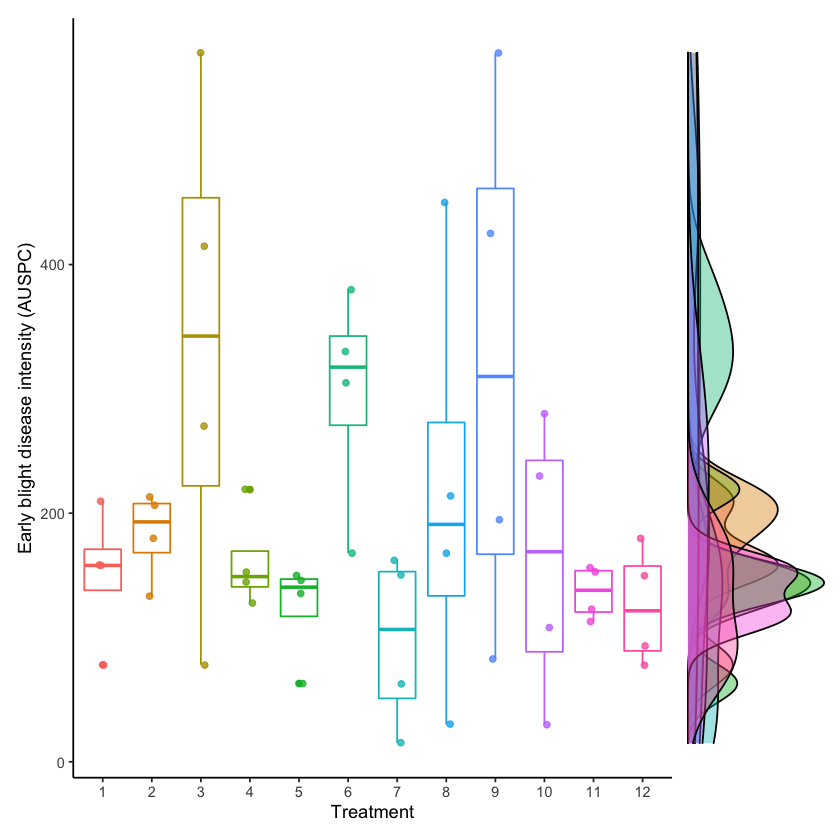

In [20]:
# Boxplots
p <- ggplot(df) +
geom_boxplot(aes(x=Treatment, y=AUDPC, color=Treatment)) +
geom_jitter(aes(x=Treatment, y=AUDPC, color=Treatment),
            alpha=0.8,
            position=position_jitter(width=0.1)) + 
labs(y="Early blight disease intensity (AUSPC)") +
theme_classic() + theme(legend.position = "none")

# Marginal histogram
mh <- ggplot(df, aes(x=AUDPC, fill=Treatment)) + 
  geom_density(alpha = 0.4) + 
  theme_void() + 
  theme(legend.position = "none") + 
  coord_flip()

# Plot all
p + mh + plot_layout(ncol = 2, nrow = 1,
                    widths = c(4, 1), heights = c(1,1))

log-transformed

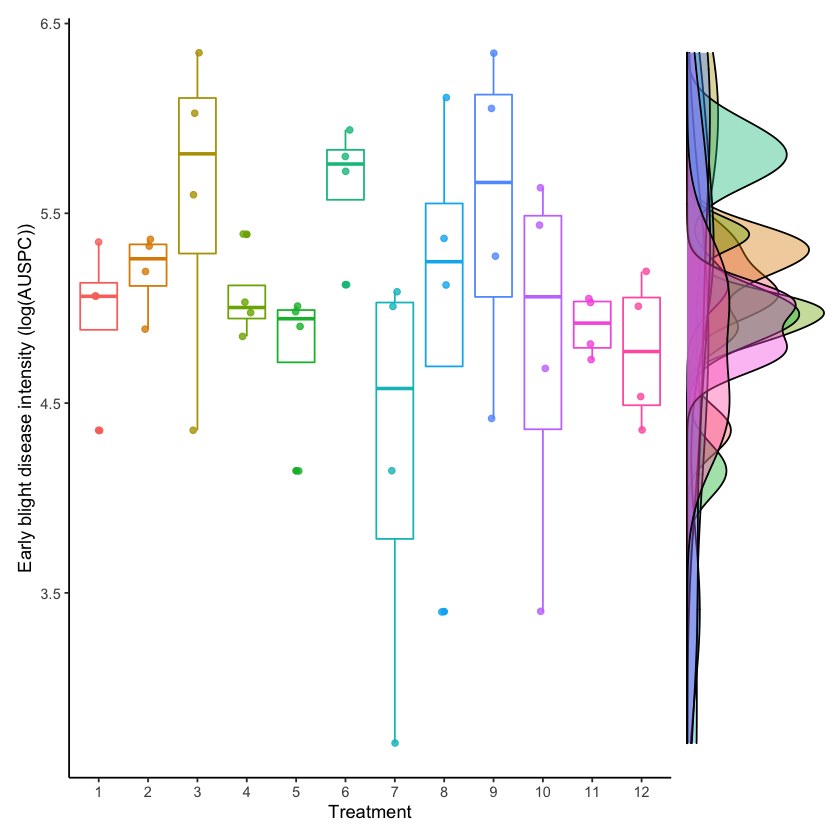

In [21]:
# Boxplots
p <- ggplot(df) +
geom_boxplot(aes(x=Treatment, y=log(AUDPC), color=Treatment)) +
geom_jitter(aes(x=Treatment, y=log(AUDPC), color=Treatment),
            alpha=0.8,
            position=position_jitter(width=0.1)) +   
labs(y="Early blight disease intensity (log(AUSPC))") +
theme_classic() + theme(legend.position = "none")

# Marginal histogram
mh <- ggplot(df, aes(x=log(AUDPC), fill=Treatment)) + 
  geom_density(alpha = 0.4) + 
  theme_void() + 
  theme(legend.position = "none") + 
  coord_flip()

# Plot all
p + mh + plot_layout(ncol = 2, nrow = 1,
                    widths = c(4, 1), heights = c(1,1))

## Inference

1. Fit ANOVA model

In [22]:
m <- lm(AUDPC ~ Treatment + Block,
       data=df)
m2 <- aov(AUDPC ~ Treatment + Block,
       data=df)

- summary

In [23]:
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Treatment,11,288001.75,26181.98,1.9102408,0.07441269
Block,3,25917.75,8639.25,0.6303209,0.60064600
Residuals,33,452301.75,13706.11,NA,NA


## Diagnostics

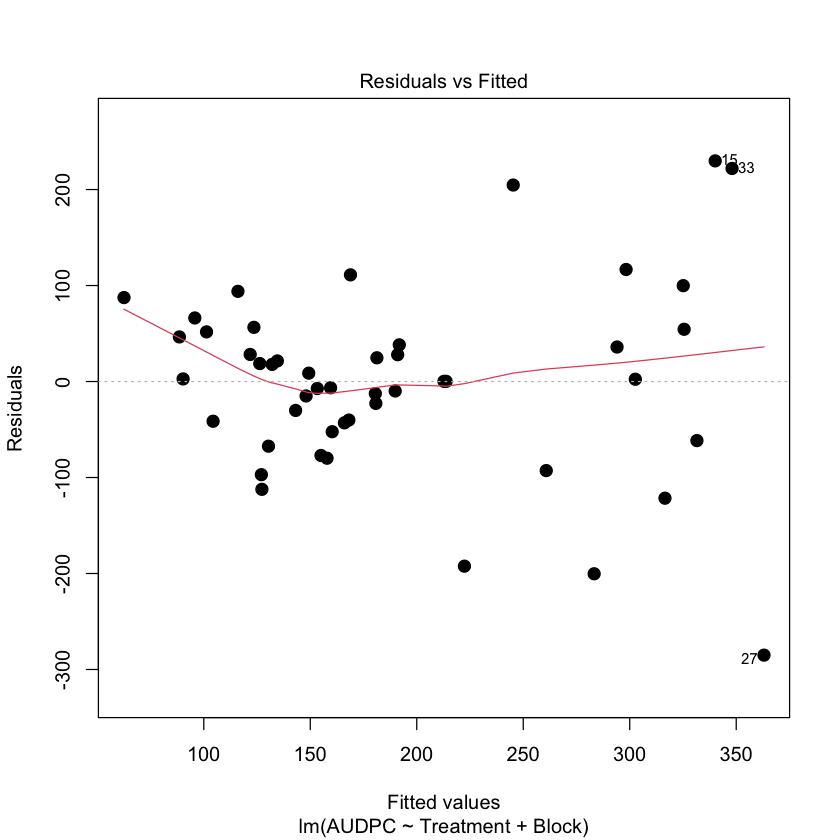

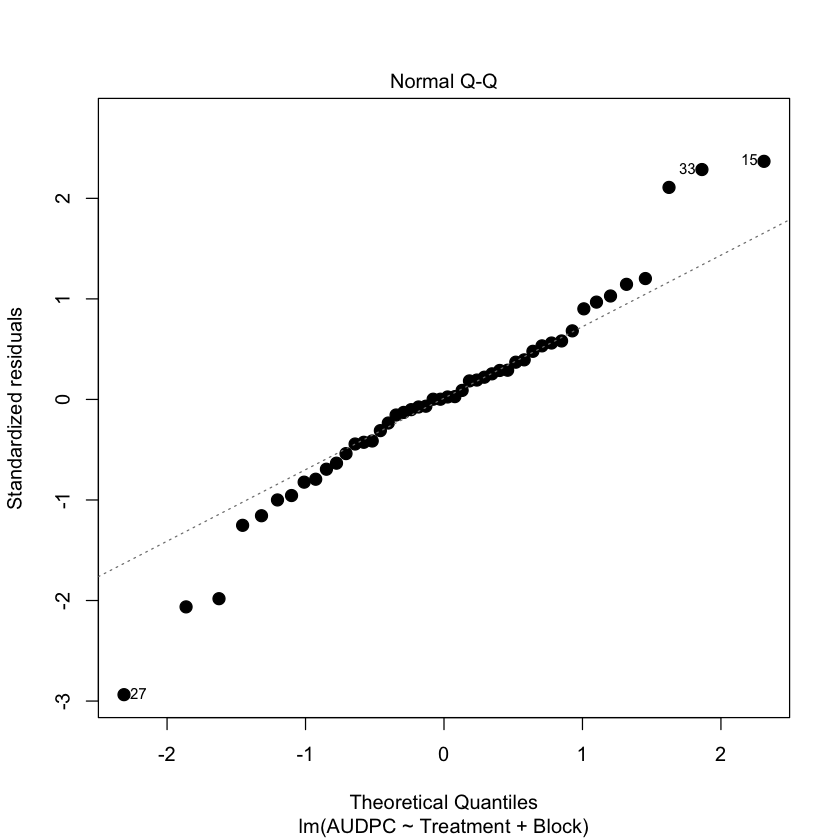

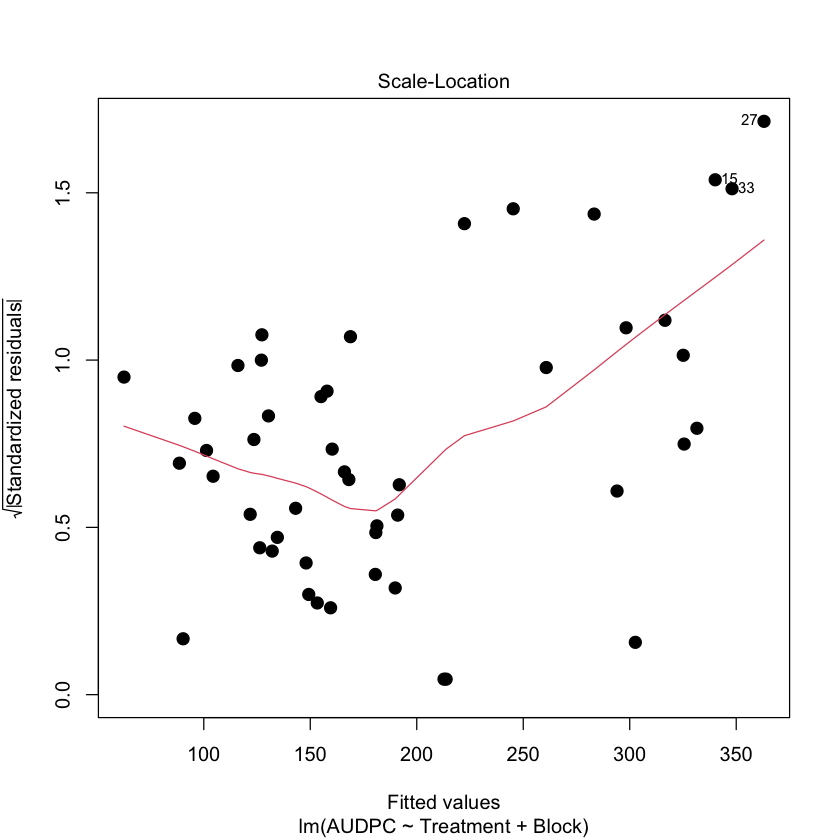

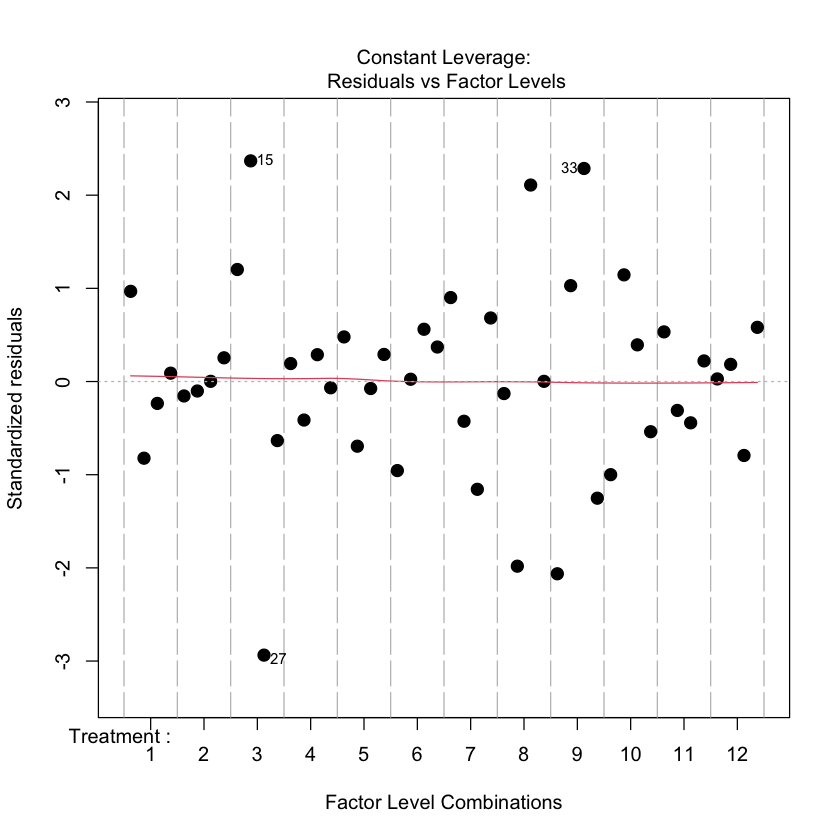

In [26]:
plot(m, pch=20, cex=2)